In [5]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [7]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [8]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [9]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

615

In [10]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [11]:
# Starting URL for Weather Map API Call. 6.2.3
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4851cf7c85999dcf057cb9ae5069fd56


In [12]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [18]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | barrow
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | busselton
Processing Record 4 of Set 1 | saskylakh
Processing Record 5 of Set 1 | katsuura
Processing Record 6 of Set 1 | monrovia
Processing Record 7 of Set 1 | dikson
Processing Record 8 of Set 1 | hermanus
Processing Record 9 of Set 1 | nemuro
Processing Record 10 of Set 1 | codrington
Processing Record 11 of Set 1 | port-gentil
Processing Record 12 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 13 of Set 1 | chokurdakh
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | sobolevo
Processing Record 16 of Set 1 | westport
Processing Record 17 of Set 1 | lebu
Processing Record 18 of Set 1 | ambad
Processing Record 19 of Set 1 | nexo
Processing Record 20 of Set 1 | vila velha
Processing Record 21 of Set 1 | cape town
Processing Record 22 of Set 1 | belushya guba
City not found.

Processing Record 37 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 38 of Set 4 | mardin
Processing Record 39 of Set 4 | richards bay
Processing Record 40 of Set 4 | cabo san lucas
Processing Record 41 of Set 4 | shubarkuduk
Processing Record 42 of Set 4 | mount isa
Processing Record 43 of Set 4 | geraldton
Processing Record 44 of Set 4 | ternate
Processing Record 45 of Set 4 | saint-pierre
Processing Record 46 of Set 4 | severo-kurilsk
Processing Record 47 of Set 4 | bouca
Processing Record 48 of Set 4 | ust-kamchatsk
City not found. Skipping...
Processing Record 49 of Set 4 | elko
Processing Record 50 of Set 4 | fort nelson
Processing Record 1 of Set 5 | martin
Processing Record 2 of Set 5 | lobito
Processing Record 3 of Set 5 | hobart
Processing Record 4 of Set 5 | verkhnyaya inta
Processing Record 5 of Set 5 | tilichiki
Processing Record 6 of Set 5 | marcona
City not found. Skipping...
Processing Record 7 of Set 5 | kinsale
Processing Record 8 of Set 5 | kalmunai

Processing Record 28 of Set 8 | cabedelo
Processing Record 29 of Set 8 | mikuni
Processing Record 30 of Set 8 | teguise
Processing Record 31 of Set 8 | makakilo city
Processing Record 32 of Set 8 | jiazi
Processing Record 33 of Set 8 | kirakira
Processing Record 34 of Set 8 | broome
Processing Record 35 of Set 8 | kruisfontein
Processing Record 36 of Set 8 | zyryanovsk
Processing Record 37 of Set 8 | brawley
Processing Record 38 of Set 8 | mandan
Processing Record 39 of Set 8 | thatcham
Processing Record 40 of Set 8 | conde
Processing Record 41 of Set 8 | tingo maria
Processing Record 42 of Set 8 | la ronge
Processing Record 43 of Set 8 | santa rosa
Processing Record 44 of Set 8 | asmar
Processing Record 45 of Set 8 | vaitupu
City not found. Skipping...
Processing Record 46 of Set 8 | koslan
Processing Record 47 of Set 8 | cap malheureux
Processing Record 48 of Set 8 | solnechnyy
Processing Record 49 of Set 8 | iwanai
Processing Record 50 of Set 8 | khotyn
Processing Record 1 of Set 9 

Processing Record 16 of Set 12 | comodoro rivadavia
Processing Record 17 of Set 12 | huanan
Processing Record 18 of Set 12 | arlit
Processing Record 19 of Set 12 | sola
Processing Record 20 of Set 12 | mandapam
Processing Record 21 of Set 12 | luderitz
Processing Record 22 of Set 12 | dondo
Processing Record 23 of Set 12 | imeni poliny osipenko
Processing Record 24 of Set 12 | gravdal
Processing Record 25 of Set 12 | beringovskiy
Processing Record 26 of Set 12 | prince rupert
Processing Record 27 of Set 12 | salalah
Processing Record 28 of Set 12 | ixtapa
Processing Record 29 of Set 12 | methala
Processing Record 30 of Set 12 | coffeyville
Processing Record 31 of Set 12 | kentau
Processing Record 32 of Set 12 | masuguru
Processing Record 33 of Set 12 | camacha
Processing Record 34 of Set 12 | kencong
Processing Record 35 of Set 12 | cravo norte
Processing Record 36 of Set 12 | diamantino
Processing Record 37 of Set 12 | kholtoson
Processing Record 38 of Set 12 | wanning
Processing Reco

In [19]:
len(city_data)

559

In [20]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Barrow,71.2906,-156.7887,39.22,93,90,18.41,US,2021-07-20 17:01:49
1,Ushuaia,-54.8000,-68.3000,34.11,81,90,2.75,AR,2021-07-20 17:00:50
2,Busselton,-33.6500,115.3333,55.04,93,100,12.75,AU,2021-07-20 17:01:49
3,Saskylakh,71.9167,114.0833,55.27,72,99,6.46,RU,2021-07-20 17:01:49
4,Katsuura,35.1333,140.3000,80.11,85,16,4.56,JP,2021-07-20 17:01:50
5,Monrovia,6.3005,-10.7969,76.77,75,67,12.59,LR,2021-07-20 16:59:30
6,Dikson,73.5069,80.5464,47.46,67,100,11.81,RU,2021-07-20 17:01:51
7,Hermanus,-34.4187,19.2345,50.90,70,35,5.75,ZA,2021-07-20 17:01:51
8,Nemuro,43.3236,145.5750,60.85,98,98,6.35,JP,2021-07-20 17:01:51
9,Codrington,-38.2667,141.9667,50.07,65,99,13.82,AU,2021-07-20 17:01:52


In [24]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Barrow,US,2021-07-20 17:01:49,71.2906,-156.7887,39.22,93,90,18.41
1,Ushuaia,AR,2021-07-20 17:00:50,-54.8000,-68.3000,34.11,81,90,2.75
2,Busselton,AU,2021-07-20 17:01:49,-33.6500,115.3333,55.04,93,100,12.75
3,Saskylakh,RU,2021-07-20 17:01:49,71.9167,114.0833,55.27,72,99,6.46
4,Katsuura,JP,2021-07-20 17:01:50,35.1333,140.3000,80.11,85,16,4.56
5,Monrovia,LR,2021-07-20 16:59:30,6.3005,-10.7969,76.77,75,67,12.59
6,Dikson,RU,2021-07-20 17:01:51,73.5069,80.5464,47.46,67,100,11.81
7,Hermanus,ZA,2021-07-20 17:01:51,-34.4187,19.2345,50.90,70,35,5.75
8,Nemuro,JP,2021-07-20 17:01:51,43.3236,145.5750,60.85,98,98,6.35
9,Codrington,AU,2021-07-20 17:01:52,-38.2667,141.9667,50.07,65,99,13.82


In [26]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [27]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [29]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'07/20/21'

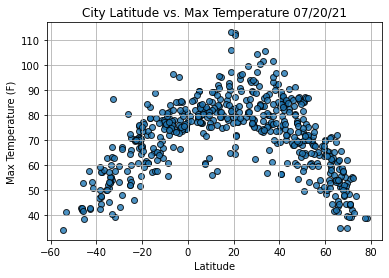

In [30]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

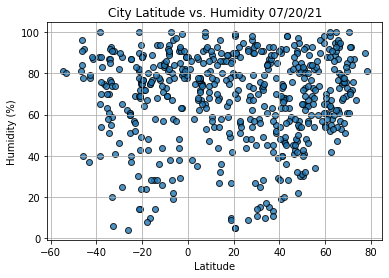

In [31]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()


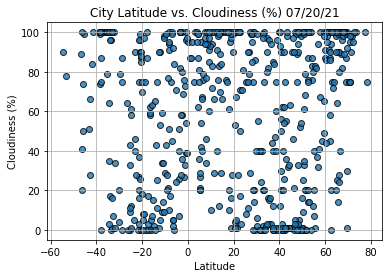

In [32]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()


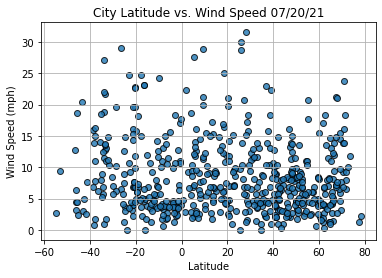

In [33]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [34]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [37]:
index13 = city_data_df.loc[13]
index13

City                     Sobolevo
Country                        RU
Date          2021-07-20 17:01:56
Lat                       54.4299
Lng                       31.8996
Max Temp                    68.97
Humidity                       69
Cloudiness                     83
Wind Speed                   5.55
Name: 13, dtype: object

In [38]:
city_data_df["Lat"] >= 0

0       True
1      False
2      False
3       True
4       True
       ...  
554     True
555     True
556     True
557     True
558     True
Name: Lat, Length: 559, dtype: bool

In [41]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Barrow,US,2021-07-20 17:01:49,71.2906,-156.7887,39.22,93,90,18.41
3,Saskylakh,RU,2021-07-20 17:01:49,71.9167,114.0833,55.27,72,99,6.46
4,Katsuura,JP,2021-07-20 17:01:50,35.1333,140.3000,80.11,85,16,4.56
5,Monrovia,LR,2021-07-20 16:59:30,6.3005,-10.7969,76.77,75,67,12.59
6,Dikson,RU,2021-07-20 17:01:51,73.5069,80.5464,47.46,67,100,11.81


In [51]:
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

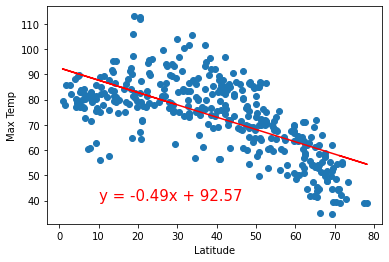

In [52]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
#Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

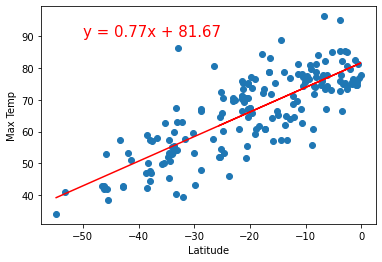

In [53]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

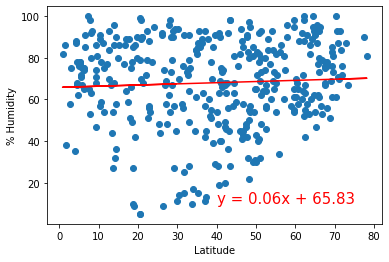

In [54]:
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

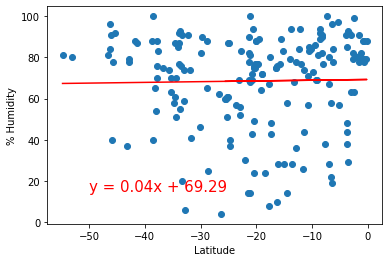

In [55]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

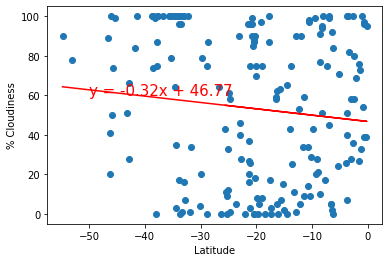

In [57]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

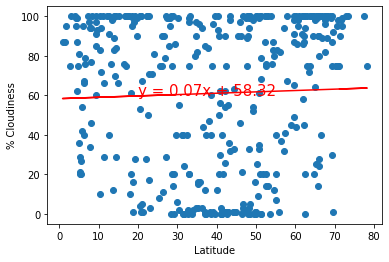

In [59]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(20,60))

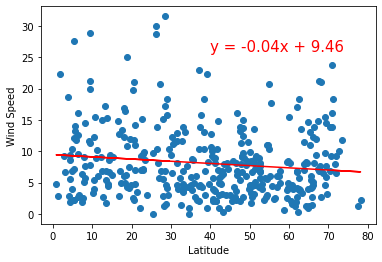

In [62]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,26))

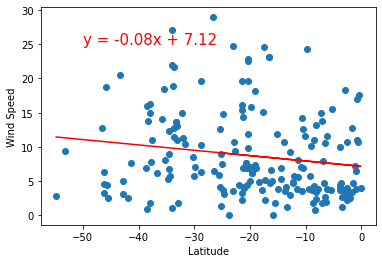

In [64]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,25))